In [1]:
from sklearn.datasets import  fetch_openml
mnist=fetch_openml("mnist_784",version=1,as_frame=False)s
X=mnist['data']
y=mnist['target']
y=y.astype(int)

In [3]:
print(X[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1000,random_state=42,stratify=y)

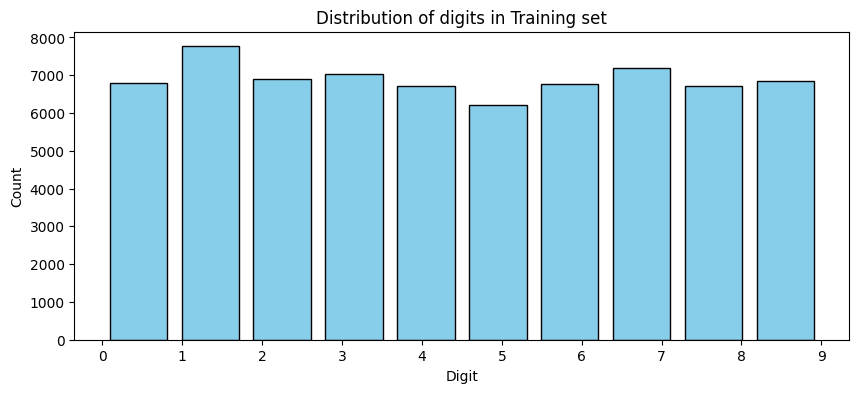

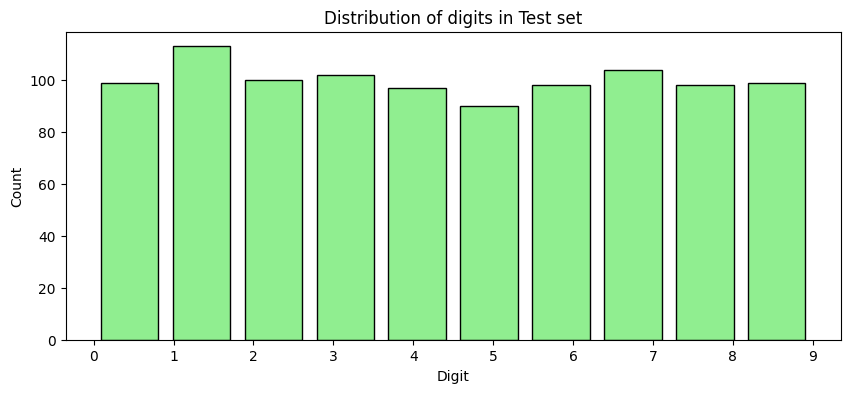

In [15]:
import matplotlib.pyplot as plt

# Training set
plt.figure(figsize=(10,4))
plt.hist(y_train, bins=10, rwidth=0.8, color='skyblue', edgecolor='black')
plt.title('Distribution of digits in Training set')
plt.xlabel('Digit')
plt.ylabel('Count')
plt.xticks(range(10))
plt.show()

# Test set
plt.figure(figsize=(10,4))
plt.hist(y_test, bins=10, rwidth=0.8, color='lightgreen', edgecolor='black')
plt.title('Distribution of digits in Test set')
plt.xlabel('Digit')
plt.ylabel('Count')
plt.xticks(range(10))
plt.show()


In [16]:
from sklearn.linear_model import SGDClassifier
SGD_CLF=SGDClassifier(loss='hinge',random_state=42)
SGD_CLF.fit(X_train,y_train)


SGDClassifier(random_state=42)

In [17]:
from sklearn.ensemble import RandomForestClassifier
RF_CLASSIFIER=RandomForestClassifier(n_estimators=100,random_state=42)
RF_CLASSIFIER.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

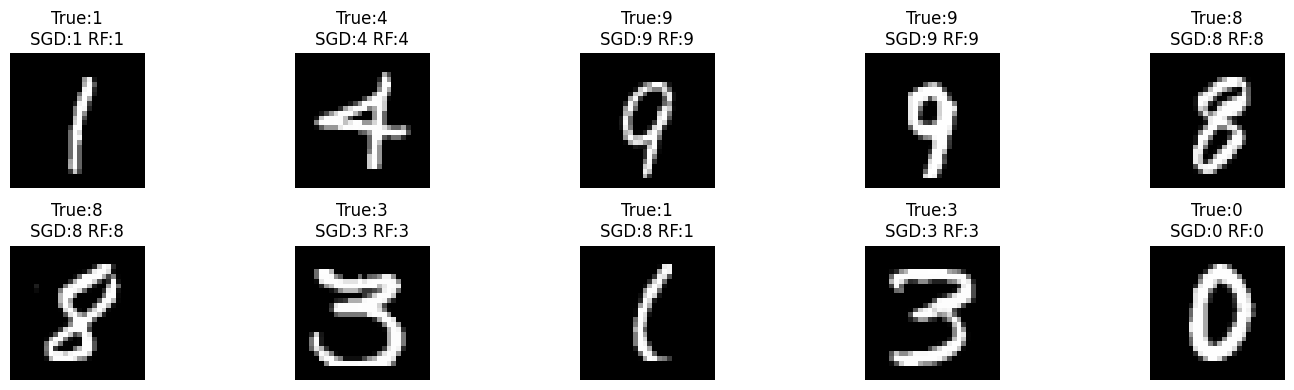

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Randomly pick 10 indexes from the test set
np.random.seed(42)  # so we always get the same images
sample_indexes = np.random.choice(len(X_test), 10, replace=False)

plt.figure(figsize=(15,4))

for i, idx in enumerate(sample_indexes):
    img = X_test[idx].reshape(28,28)
    true_label = y_test[idx]
    sgd_pred = SGD_CLF.predict(X_test[idx].reshape(1, -1))[0]
    rf_pred = RF_CLASSIFIER.predict(X_test[idx].reshape(1, -1))[0]

    plt.subplot(2, 5, i+1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f"True:{true_label}\nSGD:{sgd_pred} RF:{rf_pred}")

plt.tight_layout()
plt.show()


In [22]:
from sklearn.metrics import confusion_matrix, classification_report
#SGD
y_pred_SGD=SGD_CLF.predict(X_test)
print("Confusion MATRIX FOR SGD")
print(confusion_matrix(y_test,y_pred_SGD))
print("Classification report for SGD")
print(classification_report(y_test,y_pred_SGD))


Confusion MATRIX FOR SGD
[[ 91   0   1   1   0   0   0   0   6   0]
 [  0 110   2   0   0   0   0   0   1   0]
 [  1   0  88   1   2   1   0   2   5   0]
 [  0   1   6  82   1   4   0   1   5   2]
 [  0   1   3   0  68   0   0   0  14  11]
 [  0   0   2   4   0  68   1   0  14   1]
 [  1   0   3   0   0   0  87   0   6   1]
 [  0   2   2   1   0   0   0  85   5   9]
 [  0   3   3   1   0   0   0   0  87   4]
 [  0   0   0   0   1   1   0   1   8  88]]
Classification report for SGD
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        99
           1       0.94      0.97      0.96       113
           2       0.80      0.88      0.84       100
           3       0.91      0.80      0.85       102
           4       0.94      0.70      0.80        97
           5       0.92      0.76      0.83        90
           6       0.99      0.89      0.94        98
           7       0.96      0.82      0.88       104
           8       0.58    

In [23]:
y_pred_rf = RF_CLASSIFIER.predict(X_test)
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Confusion Matrix:
[[ 95   0   0   0   0   0   1   0   3   0]
 [  0 111   1   0   0   0   0   0   1   0]
 [  1   0  96   0   1   0   0   1   1   0]
 [  0   0   1  97   0   2   0   2   0   0]
 [  0   0   1   0  92   0   1   0   0   3]
 [  0   0   0   0   0  87   0   1   1   1]
 [  0   0   0   0   1   0  96   0   1   0]
 [  0   1   2   0   0   0   0 100   0   1]
 [  0   0   0   0   0   1   0   0  93   4]
 [  0   2   0   0   1   0   1   0   0  95]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        99
           1       0.97      0.98      0.98       113
           2       0.95      0.96      0.96       100
           3       1.00      0.95      0.97       102
           4       0.97      0.95      0.96        97
           5       0.97      0.97      0.97        90
           6       0.97      0.98      0.97        98
           7       0.96      0.96      0.96       104
           8       0.93      0.95      0.94       

In [25]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
sgd_clf_scaled=SGDClassifier(loss='hinge',random_state=42)
sgd_clf_scaled.fit(X_train_scaled,y_train)
print(classification_report(y_test, sgd_clf_scaled.predict(X_test_scaled)))
print(confusion_matrix(y_test,sgd_clf_scaled.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93        99
           1       0.96      0.95      0.96       113
           2       0.89      0.92      0.91       100
           3       0.97      0.86      0.91       102
           4       0.96      0.88      0.91        97
           5       0.93      0.86      0.89        90
           6       0.97      0.94      0.95        98
           7       0.94      0.90      0.92       104
           8       0.63      0.94      0.76        98
           9       0.92      0.84      0.88        99

    accuracy                           0.90      1000
   macro avg       0.91      0.90      0.90      1000
weighted avg       0.91      0.90      0.90      1000

[[ 89   0   1   0   0   1   0   0   8   0]
 [  0 107   1   0   0   0   0   0   5   0]
 [  1   0  92   0   1   0   0   2   4   0]
 [  2   0   1  88   0   4   0   2   4   1]
 [  0   0   2   0  85   0   1   0   5   4]
 [  0   0   0   2   0  77 

- Before scaling: accuracy 85%, after scaling: 90%.
- Scaling improved recall on digit 8, but precision dropped,
  meaning classifier finds most 8s, but also mistakes other digits as 8.
- Major confusion: model often predicts 8 when it’s actually 0 or 9.



In [40]:
import gradio as gr
import numpy as np
import cv2

def predict_digit(image):
    if image is None:
        return "No image provided!"

    image = np.array(image)
    image = 255 - image          # invert colors manually
    image = cv2.resize(image, (28,28))

    if len(image.shape) == 3:
        image = image.mean(axis=2)

    image = image.reshape(1, -1)
    prediction = int(RF_CLASSIFIER.predict(image)[0])
    return f"Predicted digit: {prediction}"

interface = gr.Interface(
    fn=predict_digit,
    inputs=gr.Image(image_mode='L'),
    outputs="text"
)

interface.launch(debug=True)


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://9ae0f581fb0a10242c.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7862 <> https://9ae0f581fb0a10242c.gradio.live
